# Touring Times of Graphs

In [1]:
# Here are the necessary imports

# tour_graph is a module I wrote in Cython to run a fast tour simulation
from tour_graph import tour_graph as tg
# networkx for easy creation and manipulation of graphs and networks
import networkx as nx
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Creating Graphs

[NetworkX](https://networkx.github.io/) makes it very to create and manipualte graphs and networks of any size and shape.

We will begin by creating a comlete graph with 5 nodes.

In [2]:
# create the graph
g_1 = nx.Graph()

In [3]:
# add the edges, which also creates the nodes if they don't already exist
g_1.add_edges_from(it.combinations(range(5),2))

## Visualizing Graphs

NetowrkX provides many built in visualization tools which run off of matplotlib.

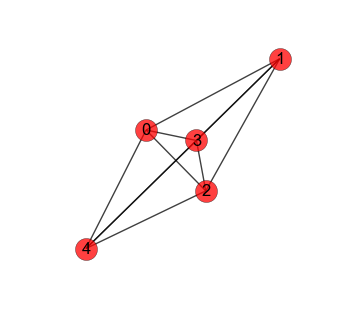

In [4]:
fig_1, ax_1 = plt.subplots(figsize=(3.5,3.5))
nx.draw(g_1, ax=ax_1, node_size=250, with_labels=True, alpha=0.75)

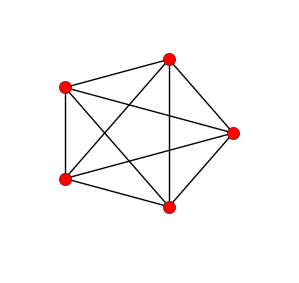

In [5]:
fig_2, ax_2 = plt.subplots(figsize=(3,3))
nx.draw_circular(g_1, ax=ax_2, node_size=80)

## Going For a Tour!

We will take a tour of this graph. This tour will begin at node 0 then walk to an adjacent (connected) node. After each stop on the tour the next node to be visited will be chosen randomly from the adjacent nodes. Adjacent nodes all have an equal probability of being selected because this is an unweighted graph. We will stop the tour when all nodes have been visited.

My tour_graph function uses a numpy adjacency matrix to run the tour. We can generate this matrix directly with networkX!

In [6]:
nx.to_numpy_matrix(g_1).shape

(5, 5)

In [7]:
time, _ = tg.tour_graph(nx.to_numpy_matrix(g_1))
print('Tour time: ',time)

Tour time:  10


### A Distribution of Touring Times

We can repeate this tour many times to get a distribution of touring times. This is implemented in the function `run_simulation` in my `tour_graph` module. The `tour_graph` module is implemented in Cython and is exceptionally fast!

In [8]:
%%time
times = tg.run_simulation(nx.to_numpy_matrix(g_1), n=1000)

CPU times: user 196 ms, sys: 14.1 ms, total: 210 ms
Wall time: 201 ms


In [24]:
np.savetxt("graph_data/examples/complete_5_graph.csv",np.asanyarray(times, dtype=np.int8),delimiter=',')

**We can see the distribution with a histogram.**

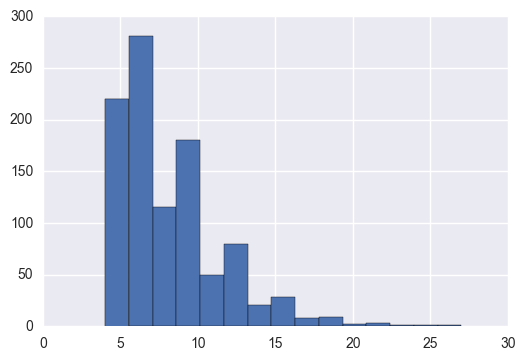

In [9]:
plt.hist(times, bins=15);

We can also visualize this with a kernel density plot.

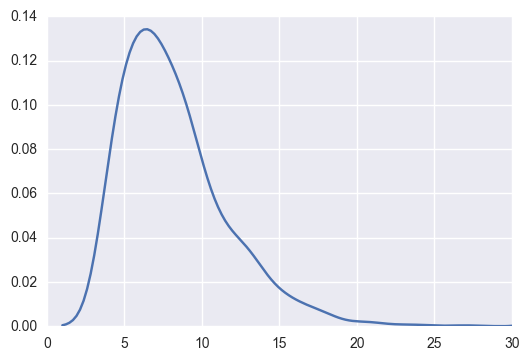

In [17]:
sns.kdeplot(times, bw=1);

Let's overlay those two plots.

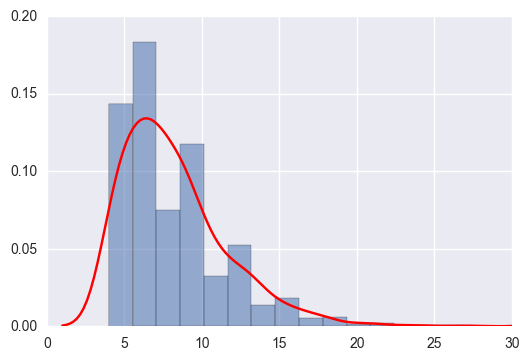

In [11]:
fig, ax_3 = plt.subplots(figsize=(6,4))
ax_3.hist(times, bins=15, alpha=0.55, normed=True);
sns.kdeplot(times, bw=1, ax=ax_3, color='r',);

## Complete and Non-Complete Graphs

So far the graph that we looked at was a complete graph with 5 nodes. Complete meaning that every node is connected to every other node, which yields $\frac{n(n-1)}{2}$ edges for a graph with $n$ nodes. A non-complete graph contains at least two nodes which are not connected by an edge.

In [18]:
g_2 = nx.Graph()
g_2.add_edges_from(it.combinations(range(5),2))
g_2.remove_edges_from(it.combinations(range(1,4),2))

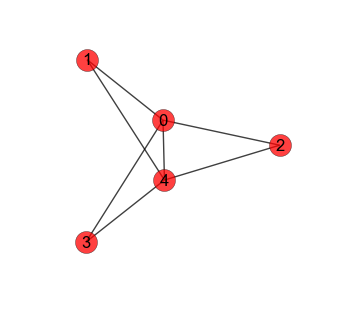

In [19]:
fig, ax = plt.subplots(figsize=(3.5,3.5))
nx.draw(g_2, ax=ax, node_size=250, with_labels=True, alpha=0.75)

We will begin to remove edges from the complete graph to get all graphs with $n$ nodes, with one exception; we will disregard disconnected graphs as a graph with more than one disconnected sections cannot be toured. It is important to check that each graph is connected. It is also important to note that many of these edge combinations will produce isomorphic graphs that may produce similar touring times. As the number of nodes increases, checking for equivalence among graphs is not alwayrs tractable.

There is no need to look at graphs with less than $n-1$ edges since it will be disconnected. There is also no need to check more than $\frac{n(n-1)}{2}$ since that is a complete graph.

In [20]:
def gen_all_edge_combos_iterable(num_nodes, num_edges):
    return it.combinations(it.combinations(range(num_nodes),2),num_edges)

def gen_all_edge_combos_list(num_nodes, num_edges):
    return list(gen_all_edge_combos_iterable(num_nodes, num_edges))

In [ ]:
def gen_all_graphs(num_nodes, num_edges):

In [ ]:
def edge_combinations(num_nodes=5, num_edges=5):
    

def graph_combinations(num_nodes=5):
    low = num_nodes - 1
    high = num_nodes(num_nodes-1)/2
    l = []
    for i in range(low, high + 1):
        

In [15]:
list(it.combinations(range(5),2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [21]:
len(list(it.combinations(range(5),2)))

10

In [22]:
list(it.combinations(it.combinations(range(5),2),5))

[((0, 1), (0, 2), (0, 3), (0, 4), (1, 2)),
 ((0, 1), (0, 2), (0, 3), (0, 4), (1, 3)),
 ((0, 1), (0, 2), (0, 3), (0, 4), (1, 4)),
 ((0, 1), (0, 2), (0, 3), (0, 4), (2, 3)),
 ((0, 1), (0, 2), (0, 3), (0, 4), (2, 4)),
 ((0, 1), (0, 2), (0, 3), (0, 4), (3, 4)),
 ((0, 1), (0, 2), (0, 3), (1, 2), (1, 3)),
 ((0, 1), (0, 2), (0, 3), (1, 2), (1, 4)),
 ((0, 1), (0, 2), (0, 3), (1, 2), (2, 3)),
 ((0, 1), (0, 2), (0, 3), (1, 2), (2, 4)),
 ((0, 1), (0, 2), (0, 3), (1, 2), (3, 4)),
 ((0, 1), (0, 2), (0, 3), (1, 3), (1, 4)),
 ((0, 1), (0, 2), (0, 3), (1, 3), (2, 3)),
 ((0, 1), (0, 2), (0, 3), (1, 3), (2, 4)),
 ((0, 1), (0, 2), (0, 3), (1, 3), (3, 4)),
 ((0, 1), (0, 2), (0, 3), (1, 4), (2, 3)),
 ((0, 1), (0, 2), (0, 3), (1, 4), (2, 4)),
 ((0, 1), (0, 2), (0, 3), (1, 4), (3, 4)),
 ((0, 1), (0, 2), (0, 3), (2, 3), (2, 4)),
 ((0, 1), (0, 2), (0, 3), (2, 3), (3, 4)),
 ((0, 1), (0, 2), (0, 3), (2, 4), (3, 4)),
 ((0, 1), (0, 2), (0, 4), (1, 2), (1, 3)),
 ((0, 1), (0, 2), (0, 4), (1, 2), (1, 4)),
 ((0, 1), (